In [35]:
# df = pd.read_csv('../data/01_raw/conversion_paths.csv', nrows=10)
df = pd.read_csv('../data/01_raw/conversion_paths.csv')

columns_ordered = [
    'client_uuid',
    'revenue',
    'utm_source',
    'utm_medium',
    'event_dates',
    'event_timestamps',
    'days_till_conversions',
    'conversion_date',
    'conversion_timestamp',
]
df = df[columns_ordered]

In [36]:
def create_list_from_string(text):
    # "['word1', 'word2']" -> ['word1', 'word2'] 
    
    text = text[1:-1]
    words = text.split(',')
    return [word[1:-1] for word in words]

df.utm_source = df.utm_source.apply(create_list_from_string)
df.utm_medium = df.utm_medium.apply(create_list_from_string)

In [49]:
def get_unique_values(series):
    unique = set()
    for sources in series:
        for source in sources:
            unique.add(source)
    return unique
    
print(get_unique_values(df.utm_source))
print(get_unique_values(df.utm_medium))

{'google', 'bing.com', 'facebook', 'synerise', 'google.com', '(direct)', 'facebook.com'}
{'web_push', 'cpc', 'e-mail', 'referral', '(none)', 'sms_text', 'organic'}


In [71]:
from collections import defaultdict
def get_number_of_occurences(series):
    occurences = {}
    occurences = defaultdict(lambda:0,occurences)
    for sources in series:
        for source in sources:
            occurences[source] += 1
    return dict(occurences)

source_occ = get_number_of_occurences(df.utm_source)
medium_occ = get_number_of_occurences(df.utm_medium)
print(source_occ)
print(medium_occ)

{'(direct)': 2244862, 'synerise': 188366, 'facebook': 133675, 'google.com': 74579, 'google': 348794, 'facebook.com': 86273, 'bing.com': 89278}
{'(none)': 1936219, 'organic': 133364, 'cpc': 321855, 'sms_text': 254714, 'referral': 250130, 'web_push': 132985, 'e-mail': 136560}


In [95]:
medium_occ

{'(none)': 1936219,
 'organic': 133364,
 'cpc': 321855,
 'sms_text': 254714,
 'referral': 250130,
 'web_push': 132985,
 'e-mail': 136560}

In [98]:
import matplotlib.pyplot as plt
def plot_number_of_occurences(D):
    plt.rcParams["figure.figsize"]=20,10

    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))

    plt.show()
    

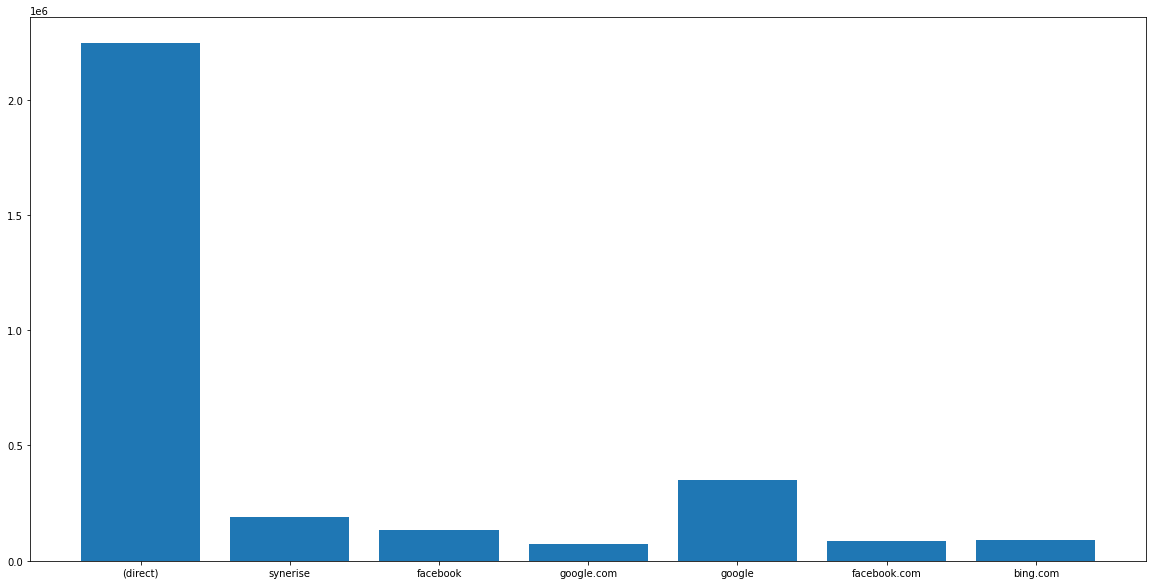

In [99]:
plot_number_of_occurences(source_occ)

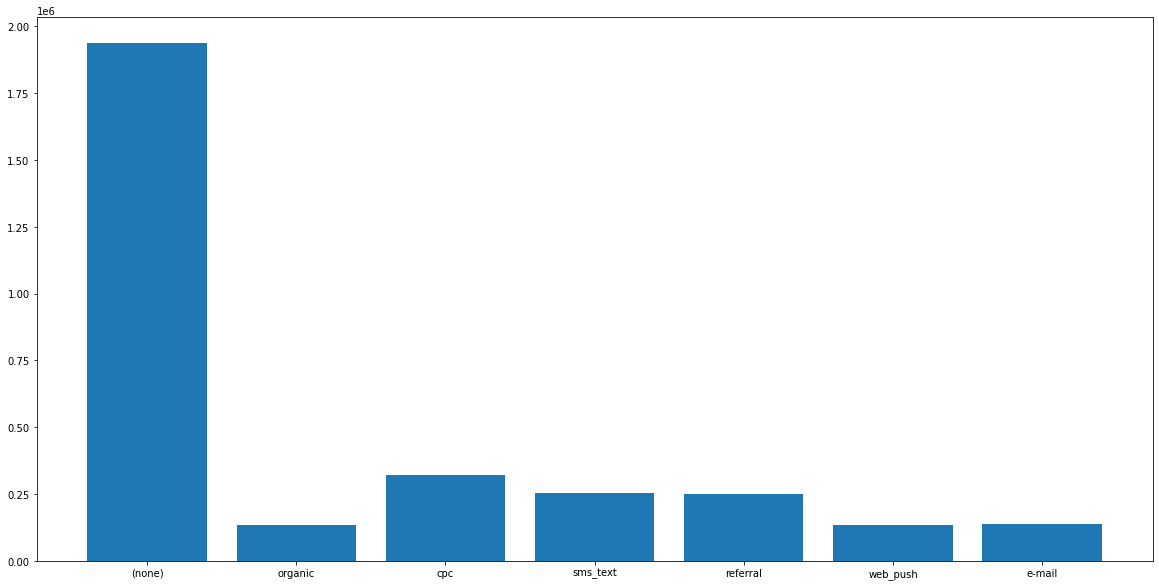

In [100]:
plot_number_of_occurences(medium_occ)